In [1]:
%matplotlib inline
%load_ext autoreload
# ! pip install git+https://github.com/avivajpeyi/pspline_psd.git -q

# Example: AR process

First, lets generate some data from an AR process and plot it.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft
from slipper.example_datasets.ar_data import generate_ar_timeseries, plot_ar_spectrogram_psd
from slipper.sample.spline_model_sampler import fit_data_with_pspline_model
from slipper.plotting import set_plotting_style
from slipper.fourier_methods import get_periodogram
from slipper.plotting.plot_spline_model_and_data import plot_spline_model_and_data

np.random.seed(42)
set_plotting_style()
N_TOTAL_MCMC_STEPS = 500

## Example 1: AR(3)

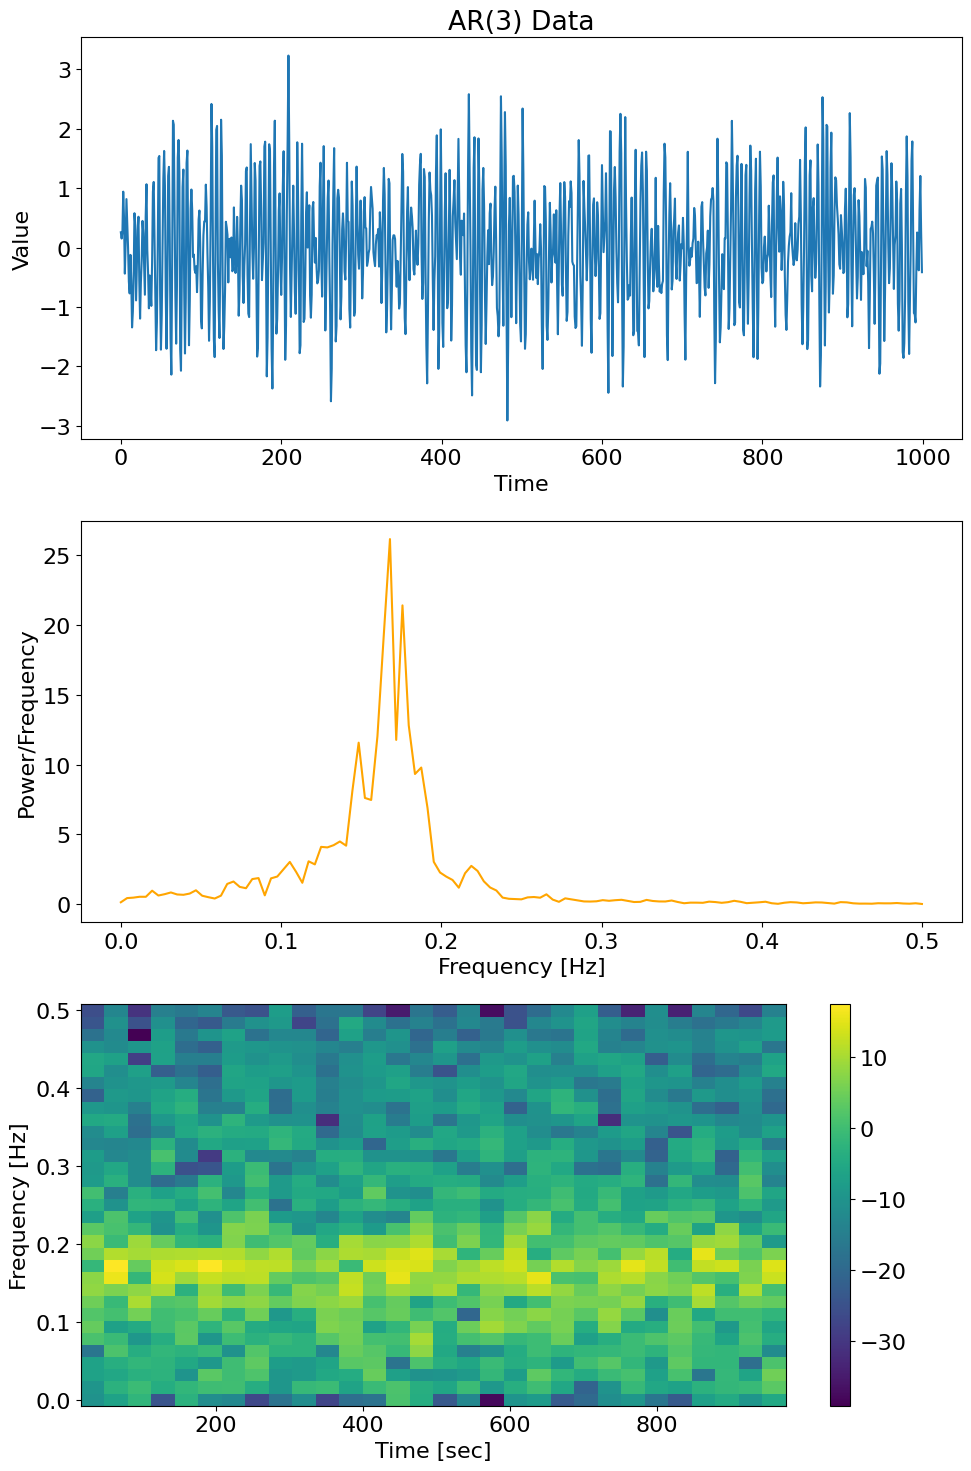

In [13]:
data = generate_ar_timeseries(order=3, n_samples=1000)
fig = plot_ar_spectrogram_psd(data, title='AR(3) Data')


|Slipper|20/08 23:16:00|  INFO  | Running sampler with the following arguments:
Sampler arguments:
{'Ntotal': 500,
 'burnin': 166,
 'plot_checkpoint': False,
 'thin': 1,
 'δα': 0.0001,
 'δβ': 0.0001,
 'τα': 0.001,
 'τβ': 0.001,
 'φα': 1,
 'φβ': 1}
Spline arguments:
{'degree': 3,
 'diffMatrixOrder': 2,
 'eqSpaced': False,
 'eqSpaced': True,
 'k': 30}
N it: 500*1 = 500


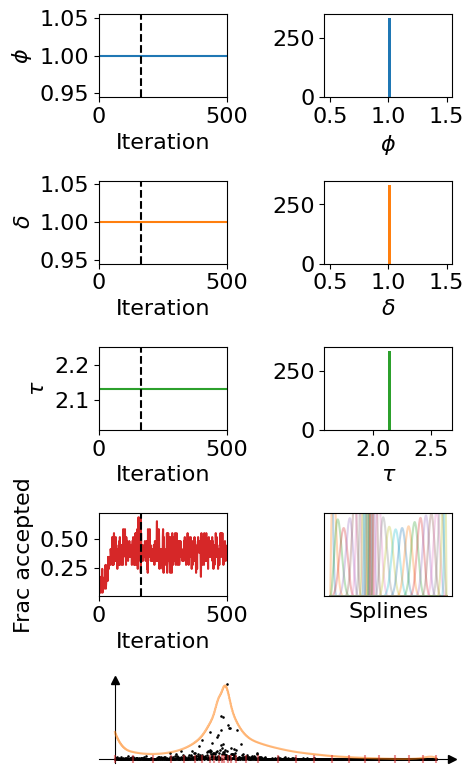

In [14]:
pdgrm = get_periodogram(timeseries=data)
mcmc = fit_data_with_pspline_model(
    data=pdgrm, Ntotal=N_TOTAL_MCMC_STEPS, degree=3, 
    eqSpaced=True, compute_psds=True
)
fig = mcmc.make_summary_plot()

## Example 2: AR(4)

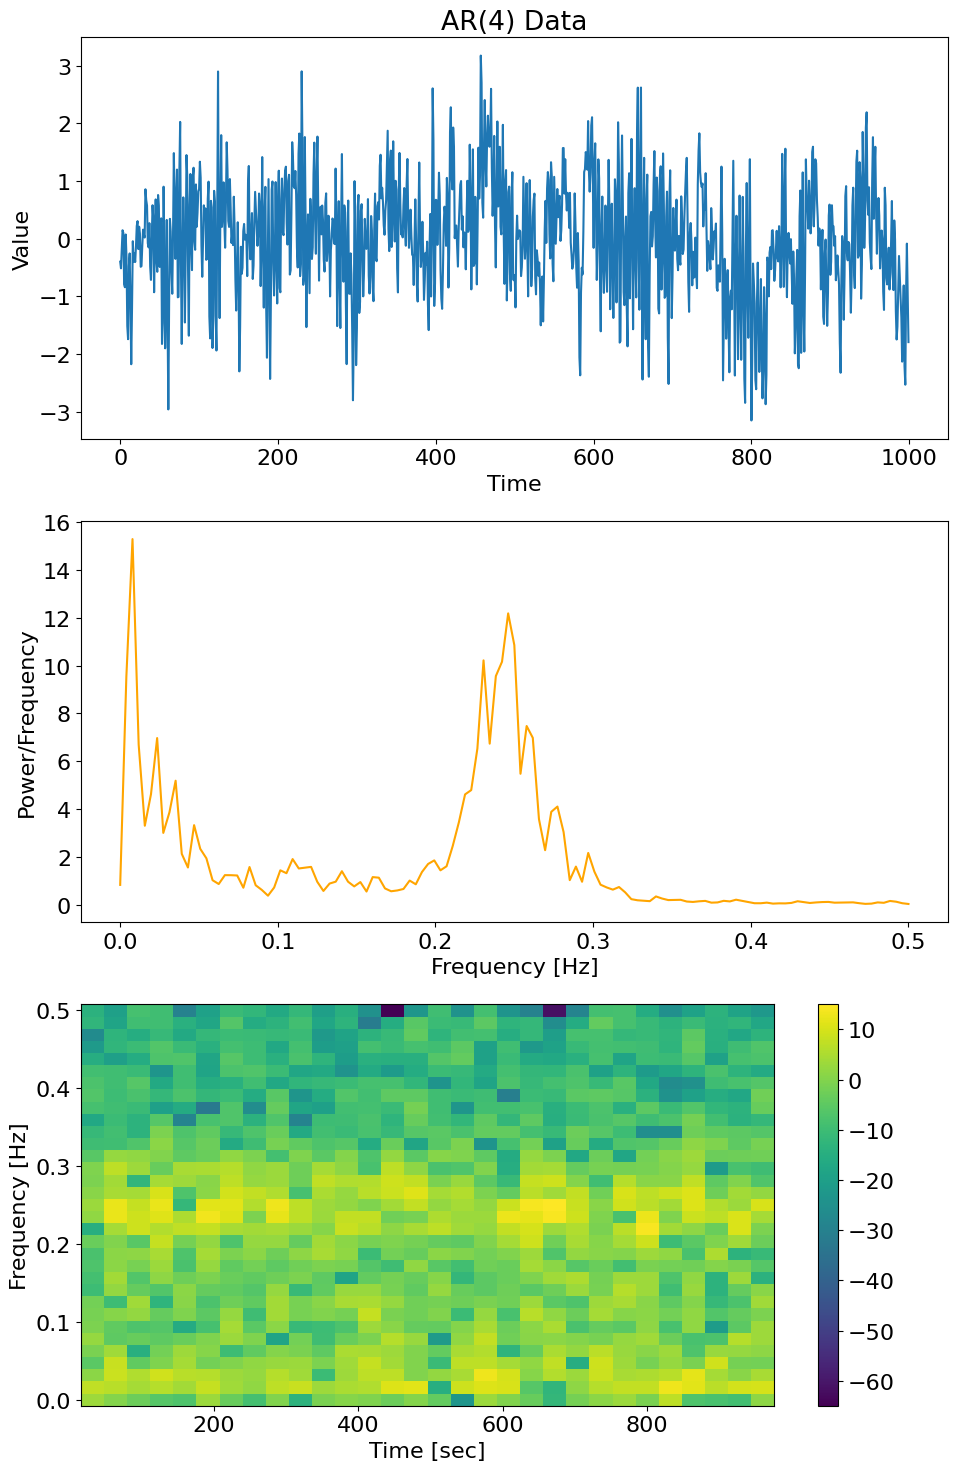

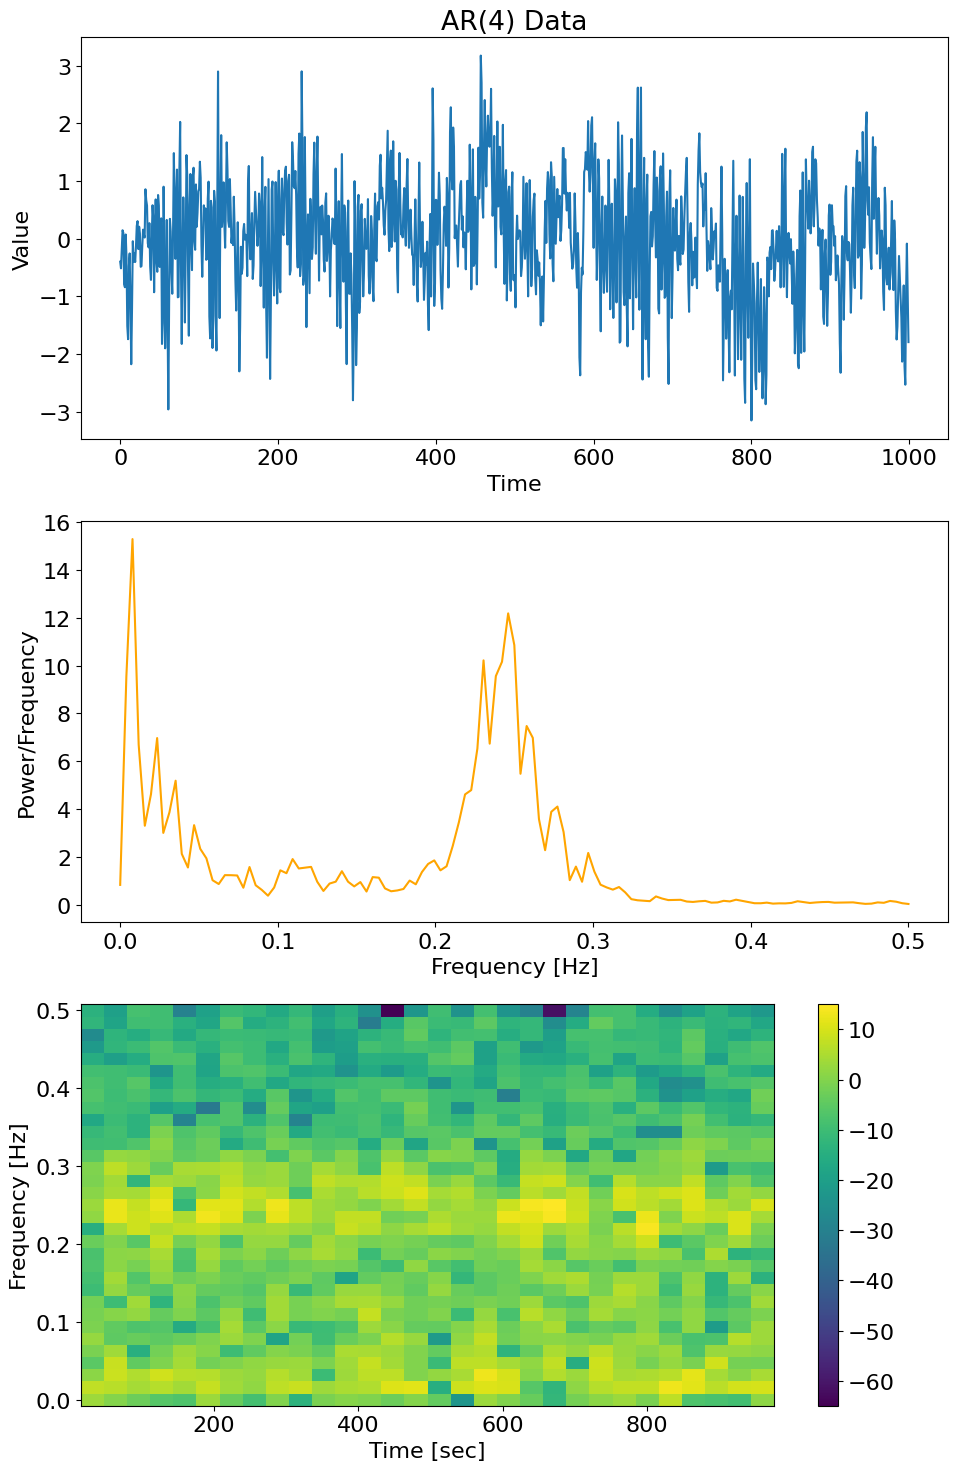

In [5]:
data = generate_ar_timeseries(order=4, n_samples=1000)
fig = plot_ar_spectrogram_psd(data, title='AR(4) Data');
fig

## Equally spaced knots

In [6]:
pdgrm = get_periodogram(timeseries=data)
mcmc = fit_data_with_pspline_model(
    data=pdgrm, Ntotal=N_TOTAL_MCMC_STEPS, degree=3, 
    eqSpaced=True, compute_psds=True
)

|Slipper|20/08 23:15:12|  INFO  | Running sampler with the following arguments:
Sampler arguments:
{'Ntotal': 500,
 'burnin': 166,
 'plot_checkpoint': False,
 'thin': 1,
 'δα': 0.0001,
 'δβ': 0.0001,
 'τα': 0.001,
 'τβ': 0.001,
 'φα': 1,
 'φβ': 1}
Spline arguments:
{'degree': 3,
 'diffMatrixOrder': 2,
 'eqSpaced': False,
 'eqSpaced': True,
 'k': 30}
N it: 500*1 = 500


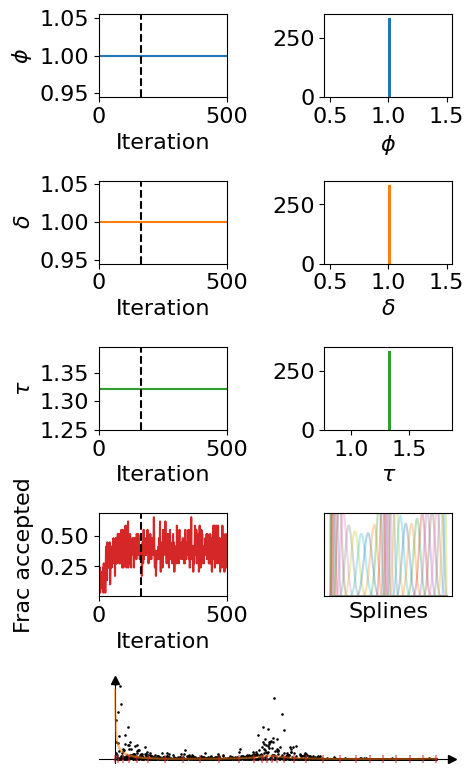

In [7]:
fig = mcmc.make_summary_plot()

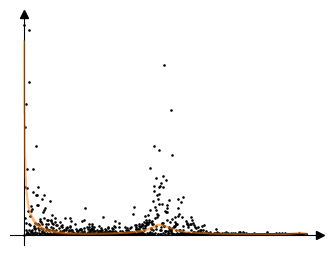

In [8]:
fig = plot_spline_model_and_data(pdgrm, mcmc.psd_quantiles, separarte_y_axis=True)

## Non-equally spaced knots

In [9]:
pdgrm = get_periodogram(timeseries=data)
mcmc = fit_data_with_pspline_model(
    data=pdgrm, Ntotal=N_TOTAL_MCMC_STEPS, degree=3, 
    eqSpaced=False, compute_psds=True
)

|Slipper|20/08 23:15:28|  INFO  | Running sampler with the following arguments:
Sampler arguments:
{'Ntotal': 500,
 'burnin': 166,
 'plot_checkpoint': False,
 'thin': 1,
 'δα': 0.0001,
 'δβ': 0.0001,
 'τα': 0.001,
 'τβ': 0.001,
 'φα': 1,
 'φβ': 1}
Spline arguments:
{'degree': 3,
 'diffMatrixOrder': 2,
 'eqSpaced': False,
 'eqSpaced': False,
 'k': 30}
N it: 500*1 = 500


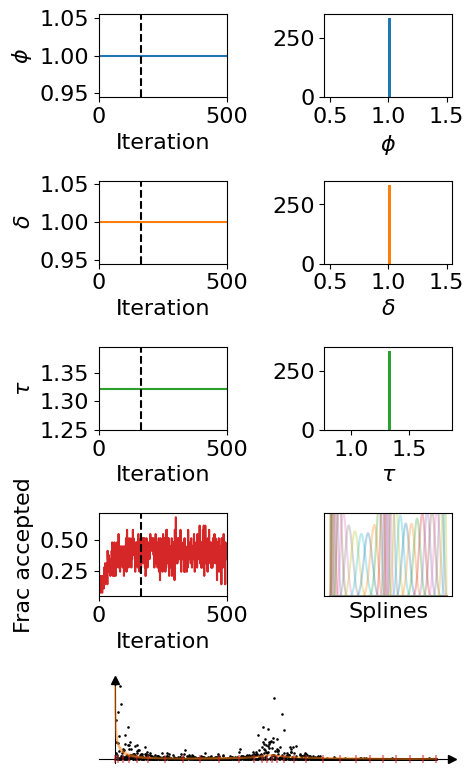

In [10]:
fig = mcmc.make_summary_plot()

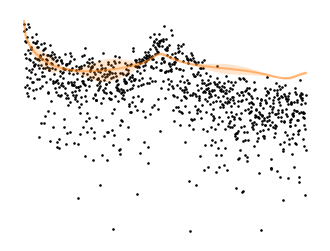

In [11]:
mcmc_quant = mcmc.get_model_quantiles()
plt_pdgrm = pdgrm[1:-1]
N = len(plt_pdgrm)
x = np.linspace(0,1,N)
fig = plot_spline_model_and_data(plt_pdgrm, mcmc_quant, separarte_y_axis=False, x=x)
for a_ in fig.get_axes():
    a_.set_yscale('log')
    a_.relim()
    